In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df = pd.read_csv('grocery_store.csv')
df.head()

,transaction_id,transaction_date,product_name,product_category,quantity,unit_price,total_price,payment_method,month
0,1,5/13/2023,Longos - Greek Salad,bakery,935,606.00,7480.23,debit card,May
1,2,2/27/2023,"Coffee - Beans, Whole",meat,620,586.74,5663.80,debit card,February
2,3,2/18/2023,"Oranges - Navel, 72",dairy,679,704.92,1251.15,mobile payment,February
3,4,10/26/2023,Zucchini - Green,frozen foods,580,141.55,6567.52,debit card,October
4,5,9/20/2023,Lid Coffee Cup 8oz Blk,frozen foods,36,725.73,9045.66,cash,September


## Column dictionary
1. **transaction_id**: A unique identifier for each transaction.
2. **transaction_date**: The date when the transaction occurred.
3. **product_name**: The name of the product purchased.
4. **product_category**: The category to which the product belongs (e.g., bakery, meat, dairy).
5. **quantity**: The number of units of the product purchased.
6. **unit_price**: The price per unit of the product.
7. **total_price**: The total price for the quantity of the product purchased (calculated as `quantity * unit_price`).
8. **customer_id**: A unique identifier for each customer.
9. **payment_method**: The method used for payment (e.g., debit card, credit card, cash, mobile payment).

In [3]:
# check the data for key informations
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    1000 non-null   int64  
 1   transaction_date  1000 non-null   object 
 2   product_name      1000 non-null   object 
 3   product_category  1000 non-null   object 
 4   quantity          1000 non-null   int64  
 5   unit_price        1000 non-null   float64
 6   total_price       1000 non-null   float64
 7   payment_method    1000 non-null   object 
 8   month             1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB
None
       transaction_id     quantity   unit_price  total_price
count     1000.000000  1000.000000  1000.000000  1000.000000
mean       500.500000   498.370000   510.263850  5094.493410
std        288.819436   287.182968   285.974901  2953.012433
min          1.000000     3.000000     0.010000    31.120000
25%  

In [4]:
# converting transaction date to date-time
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# extracting month from transaction date for better visualization
df['transaction_month'] = df['transaction_date'].dt.month_name()
df.head()

,transaction_id,transaction_date,product_name,product_category,quantity,unit_price,total_price,payment_method,month,transaction_month
0,1,2023-05-13,Longos - Greek Salad,bakery,935,606.00,7480.23,debit card,May,May
1,2,2023-02-27,"Coffee - Beans, Whole",meat,620,586.74,5663.80,debit card,February,February
2,3,2023-02-18,"Oranges - Navel, 72",dairy,679,704.92,1251.15,mobile payment,February,February
3,4,2023-10-26,Zucchini - Green,frozen foods,580,141.55,6567.52,debit card,October,October
4,5,2023-09-20,Lid Coffee Cup 8oz Blk,frozen foods,36,725.73,9045.66,cash,September,September


In [5]:
# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort by transaction_month using categorical data type
df['transaction_month'] = pd.Categorical(df['transaction_month'], categories=month_order, ordered=True)

# Sort DataFrame by transaction_month
df_sorted = df.sort_values('transaction_month')
df_sorted.head()

,transaction_id,transaction_date,product_name,product_category,quantity,unit_price,total_price,payment_method,month,transaction_month
999,1000,2023-01-24,Cabbage - Nappa,produce,546,619.72,3528.53,cash,January,January
539,540,2023-01-18,"Soup - Campbells, Spinach Crm",bakery,738,353.26,2725.15,cash,January,January
135,136,2023-01-29,Water - Evian 355 Ml,frozen foods,401,183.61,6934.33,credit card,January,January
554,555,2023-01-18,Fennel - Seeds,frozen foods,578,362.44,4939.41,debit card,January,January
572,573,2023-01-10,Veal - Leg,meat,8,330.20,8272.18,cash,January,January


In [6]:
# Sum the total quantity sold
total_quantity_sold = df_sorted['quantity'].sum()

# Sum the total revenue
total_revenue = df_sorted['total_price'].sum()

# Calculate average revenue per transaction
average_revenue_per_transaction = df_sorted['total_price'].mean()

print(f"Total Quantity Sold: {total_quantity_sold}")
print(f"Total Revenue: {total_revenue}")
print(f"Average Revenue Per Transaction: {average_revenue_per_transaction}")

Total Quantity Sold: 498370
Total Revenue: 5094493.41
Average Revenue Per Transaction: 5094.49341


# Visualizations

## Key metrics
### Total Sales: 1000
### Total Quantity Sold: 498370
### Total Revenue(USD): 5094493.41
### Average Revenue Per Transaction(USD): 5094.49341
### Total Sales Volume by Product Category
### Monthly Revenue Over Time
### Total Revenue By Product Category
### Payment Method Distribution

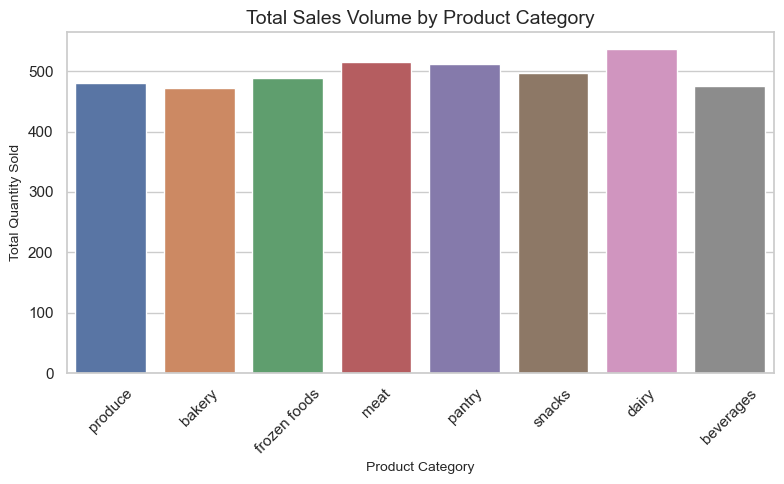

In [7]:
# Set the style for plots
sns.set(style="whitegrid")

# plotting the Sales Volume by Product Category
plt.figure(figsize=(8, 5))
sns.barplot(x='product_category', y='quantity', data=df_sorted, ci=None)
plt.title('Total Sales Volume by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=10)
plt.ylabel('Total Quantity Sold', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

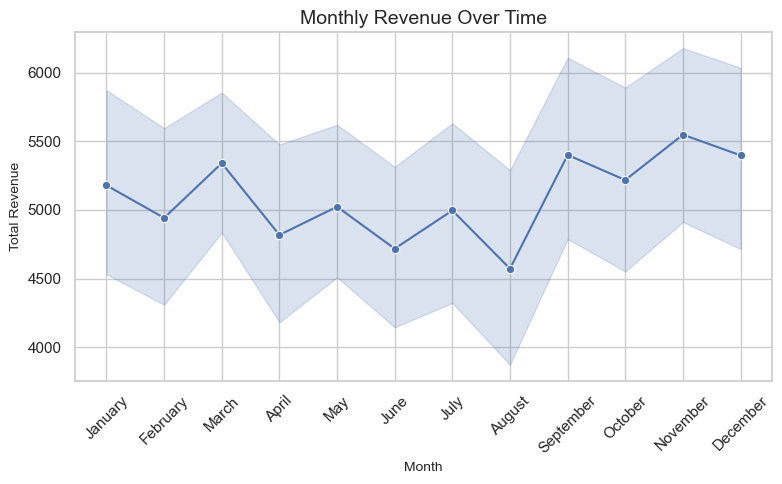

In [8]:
# Set the style for plots
sns.set(style="whitegrid")

# plotting Revenue (Total Price) over Time
plt.figure(figsize=(8, 5))
sns.lineplot(x='transaction_month', y='total_price', data=df_sorted, marker='o')
plt.title('Monthly Revenue Over Time', fontsize=14)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Total Revenue', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

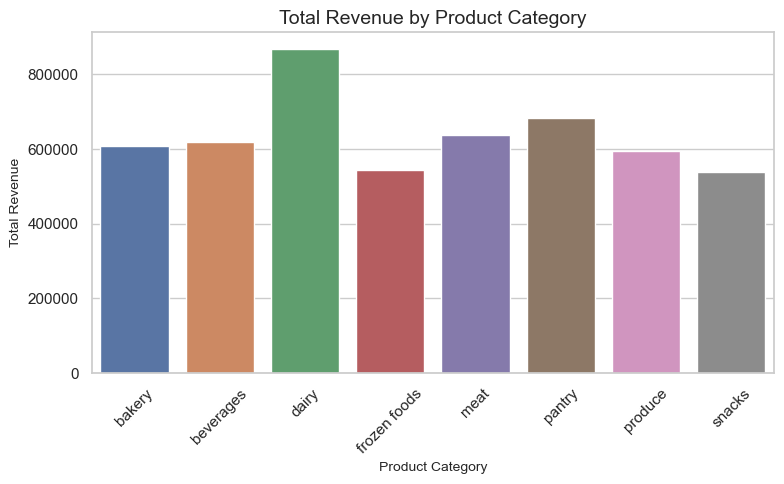

In [9]:
# Group by product category and sum the total_price
category_revenue = df_sorted.groupby('product_category')['total_price'].sum().reset_index()

# Set the style for plots
sns.set(style="whitegrid")

# plotting Total revenue by product category
plt.figure(figsize=(8, 5))
sns.barplot(x='product_category', y='total_price', data=category_revenue)
plt.title('Total Revenue by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=10)
plt.ylabel('Total Revenue', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

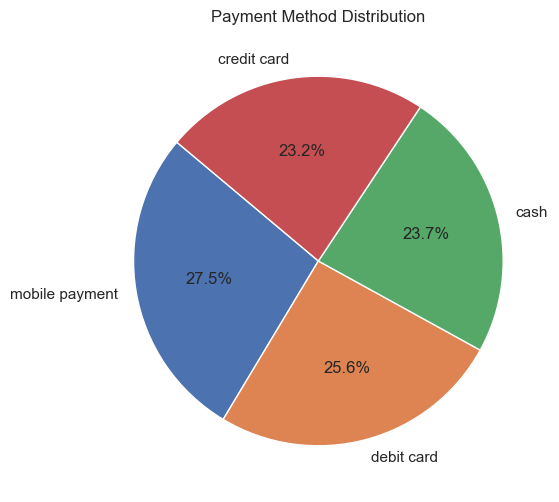

In [10]:
# Calculate the distribution of payment methods

# Payment method distribution
payment_method_count = df_sorted['payment_method'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(payment_method_count, labels=payment_method_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.show()